In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [95]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    y_hat = np.dot(tx, w)
    e = y - y_hat
    sq_e = e ** 2
    loss = sq_e.mean()
    return loss

In [97]:
compute_loss(y, tx, [1,2])

5578.989469638378

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0_list, w1_list):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0_list), len(w1_list)))
    for i, w0 in enumerate(w0_list):
        for j, w1 in enumerate(w1_list):
            losses[i, j] = compute_loss(y, tx, [w0, w1])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.029 seconds


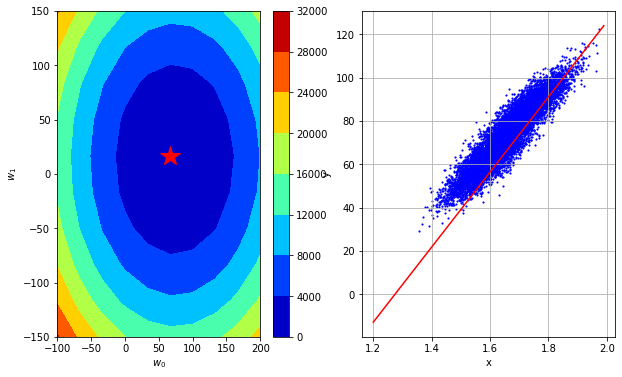

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    return (-1/len(y)) * np.dot(tx.T, y - np.dot(tx, w))

In [9]:
compute_gradient(y, tx, [100000000, 150])

array([9.99999267e+07, 1.36520287e+02])

Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=51.30574540147361, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089606, w0=66.69746902191571, w1=12.266538315839997
Gradient Descent(2/49): loss=37.878379550441274, w0=71.31498610804834, w1=13.115760199244328
Gradient Descent(3/49): loss=17.41021212017447, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638305, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.47

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

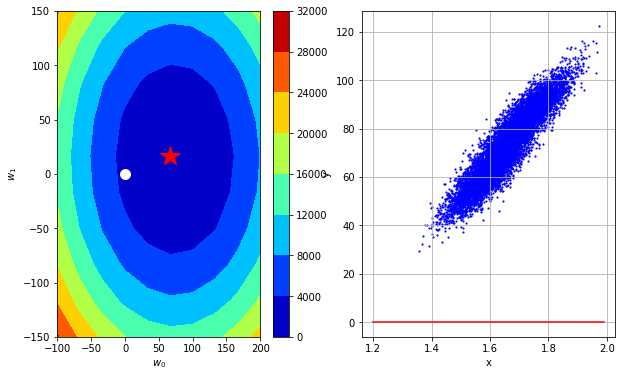

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [13]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    w = initial_w
    losses = np.zeros(max_iters)
    ws = np.zeros((max_iters, w.shape[0]))
    for i in range(max_iters):
        loss = compute_loss(y, tx, w)
        losses[i] = loss
        for batch_y, batch_tx in batch_iter(y, tx, batch_size=16, num_batches=1):
            gradient = compute_stoch_gradient(batch_y, batch_tx, w)
            w = w - gamma * gradient
        ws[i] = w
    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([-100, 100])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.063 seconds


In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


### Reducing the training set size

In [137]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [138]:
print(y.shape, tx.shape)

(200,) (200, 2)


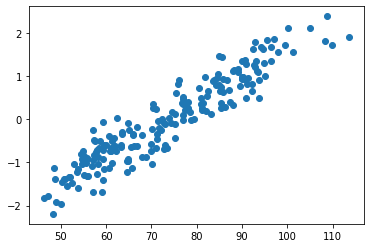

In [139]:
plt.scatter(y, tx[:,1])

In [140]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5658.544448876833, w0=51.54259072181183, w1=10.132993413506075
Gradient Descent(1/49): loss=534.100051755883, w0=67.00536793835533, w1=13.172891437557823
Gradient Descent(2/49): loss=72.90005601500053, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/49): loss=31.39205639832127, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=27.656336432820154, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=27.320121635925045, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=27.289862304204483, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=27.287138964349634, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=27.286893863762707, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=27.286871804709882, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=27.28686981939512, w0=73.63214202236942, w1=14.

In [142]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Adding some outliers

In [155]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
print(height)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

[1.84617543 1.61956457 1.75130444 1.68698379 1.77980506 1.69311873
 1.7464897  1.65415908 1.74927259 1.7417531  1.80156887 1.5932762
 1.75779236 1.82752191 1.74400237 1.76296288 1.80537587 1.77580963
 1.85541077 1.66391312 1.66060468 1.76122186 1.76178493 1.79907538
 1.61716728 1.76770188 1.70357696 1.8393321  1.73421441 1.70006511
 1.69754522 1.6849005  1.6742234  1.69250895 1.79144149 1.8651167
 1.76672158 1.80968923 1.70567423 1.55683504 1.73045512 1.66207766
 1.66572365 1.780957   1.8054684  1.76224051 1.59385372 1.62349974
 1.74740543 1.83502583 1.52686218 1.78328282 1.68912354 1.79777279
 1.82748209 1.8166126  1.83477468 1.76423638 1.6037424  1.71725933
 1.69456645 1.72979561 1.73693525 1.69210814 1.74713253 1.70094191
 1.65556296 1.70739446 1.77866764 1.88602645 1.81847425 1.8533416
 1.58815484 1.80538842 1.63846921 1.76442035 1.85772217 1.76137479
 1.76618785 1.85959288 1.71655361 1.68331415 1.67841898 1.70105515
 1.78134037 1.60149058 1.88559216 1.59615121 1.91500457 1.7695410

In [156]:
print(y.shape, tx.shape)

(202,) (202, 2)


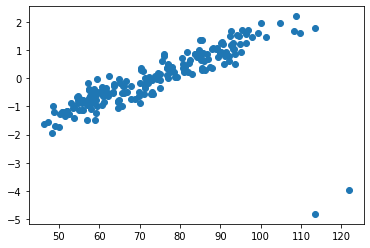

In [157]:
plt.scatter(y, tx[:,1])

In [158]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5739.670229071705, w0=51.847464098448484, w1=7.724426406192441
Gradient Descent(1/49): loss=636.56424940319, w0=67.401703327983, w1=10.041754328050121
Gradient Descent(2/49): loss=177.2847112330252, w0=72.06797509684336, w1=10.736952704607413
Gradient Descent(3/49): loss=135.94955279771042, w0=73.46785662750146, w1=10.945512217574594
Gradient Descent(4/49): loss=132.22938853853208, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=131.89457375520604, w0=74.01381042445813, w1=11.026850427631796
Gradient Descent(6/49): loss=131.8644404247067, w0=74.05160722578589, w1=11.03248153448191
Gradient Descent(7/49): loss=131.86172842496174, w0=74.06294626618423, w1=11.034170866536943
Gradient Descent(8/49): loss=131.86148434498472, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=131.86146237778675, w0=74.06736849193958, w1=11.034829706038407
Gradient Descent(10/49): loss=131.86146040073896, w0=74.06767464603033, w1=11.03

In [159]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [161]:
def compute_loss_mae(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    y_hat = np.dot(tx, w)
    e = y - y_hat
    sq_e = np.abs(e)
    loss = sq_e.mean()
    return loss

In [172]:
def compute_scalar_subgradient(y_i, tx_i, w):
    diff = y_i - tx_i.dot(w)
    if diff > 0:
        return - tx_i
    elif diff < 0:
        return tx_i
    else:
        print("Reaching point of non-differentiability")
        return 0. * (-tx_i)  
        # (-tx_i) * Any value that is a subgradient of the absolute value function, so anything between -1 and 1.

In [173]:
def compute_subgradient(y, tx, w):
    """Compute the subgradient."""
    scalar_subgradients = np.array([compute_scalar_subgradient(y_i, tx_i, w) for y_i, tx_i in zip(y, tx)])
    return scalar_subgradients.mean(axis=0)

In [174]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Subgradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        subgradient = compute_subgradient(y, tx, w)
        w = w - gamma * subgradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [175]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.95

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=74.06780585492638, w0=0.95, w1=-4.761867467996215e-16
Gradient Descent(1/499): loss=73.11780585492637, w0=1.9, w1=-9.52373493599243e-16
Gradient Descent(2/499): loss=72.16780585492637, w0=2.8499999999999996, w1=-1.4285602403988647e-15
Gradient Descent(3/499): loss=71.21780585492638, w0=3.8, w1=-1.904746987198486e-15
Gradient Descent(4/499): loss=70.26780585492638, w0=4.75, w1=-2.3809337339981075e-15
Gradient Descent(5/499): loss=69.31780585492638, w0=5.7, w1=-2.857120480797729e-15
Gradient Descent(6/499): loss=68.36780585492637, w0=6.65, w1=-3.3333072275973504e-15
Gradient Descent(7/499): loss=67.41780585492637, w0=7.6000000000000005, w1=-3.809493974396972e-15
Gradient Descent(8/499): loss=66.46780585492638, w0=8.55, w1=-4.285680721196594e-15
Gradient Descent(9/499): loss=65.51780585492638, w0=9.5, w1=-4.761867467996215e-15
Gradient Descent(10/499): loss=64.56780585492638, w0=10.45, w1=-5.2380542147958365e-15
Gradient Descent(11/499): loss=63.6178058549263

Gradient Descent(267/499): loss=6.716289274668408, w0=71.46633663366329, w1=24.228115521591707
Gradient Descent(268/499): loss=6.71643092938063, w0=71.47574257425735, w1=24.231173599216852
Gradient Descent(269/499): loss=6.716327957215134, w0=71.48514851485142, w1=24.234231676841997
Gradient Descent(270/499): loss=6.716303366909363, w0=71.47574257425735, w1=24.22616979872898
Gradient Descent(271/499): loss=6.71634406459441, w0=71.48514851485142, w1=24.229227876354123
Gradient Descent(272/499): loss=6.716287602621017, w0=71.4663366336633, w1=24.227294100228896
Gradient Descent(273/499): loss=6.716433573559882, w0=71.47574257425737, w1=24.23035217785404
Gradient Descent(274/499): loss=6.716330601394385, w0=71.48514851485143, w1=24.233410255479185
Gradient Descent(275/499): loss=6.716296396173672, w0=71.47574257425737, w1=24.225348377366167
Gradient Descent(276/499): loss=6.716346708773663, w0=71.48514851485143, w1=24.228406454991312
Gradient Descent(277/499): loss=6.716285930573628, w0=7

In [176]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    plt.show()

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws), step=10))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1, step=10), Output()), _dom_class…

<function __main__.plot_figure(n_iter)>